# Between Subject Counterbalanced Discrimination Sequences 

- use all 192 images from the verbal judgement sequences
- randomly pick discriminations 
- try to ensure that the depth differences are evenly distributed 

In [993]:
import json 
import numpy as np 
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
import copy
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


In [122]:
# p0 = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_MTurk/jsons/a.json'
p0 = '/Users/prachi/Documents/depth_duration/SUN-RGBD_stimuli_prep/V2_sequences/a.json'

with open(p0) as f:
    seq_a = json.load(f)

In [5]:
VE_seq = []

for trial in seq_a:
    if trial['sequence'] != 'catch_trial':
        img = trial['image_path']
        depth = trial['depth']

        VE_seq.append([img, depth])

VE_seq_arr = np.array(VE_seq)

In [902]:
# indeces to VE trials 
indeces = np.arange(0,192)
# randomly shuffle the order so that discrimination trials can be made 
random.shuffle(indeces)

# make groups of two (discrimination trials)
picks = [indeces[i:i + 2] for i in range(0, len(indeces), 2)] 

# # list of discrimination trials based on random picks
# discriminations = []

# for combo in picks:
#     img0 = VE_seq_arr[combo[0]]
#     img1 = VE_seq_arr[combo[1]]
#     discriminations.append([img0, img1])
    
# # look at distribution of depth differences in the random sequence

# differences = []

# for trial in discriminations:
#     depth0 = float(trial[0][1])
#     depth1 = float(trial[1][1])
    
#     diff = abs(depth0-depth1)
#     differences.append(diff)

    
    
# plt.figure()


# plt.hist(differences)
# plt.title('Distribution of Depth Differences')


# print(np.array(differences).mean(),np.array(differences).std())
# print(chisquare(differences, uniform))

# plt.show()



0.9900910785370314
96


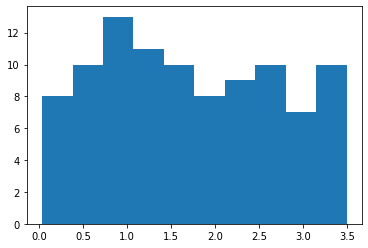

In [245]:
# std of uniform distribution 

std_uniform = (3.5-0)/(np.sqrt(12))

# uniform distribution 
uniform = np.random.uniform(low = 0.0, high = 3.6, size = len(differences))  
plt.hist(uniform)
print(np.array(uniform).std())
print(len(uniform))
plt.show();

In [79]:
option1 = copy.deepcopy(discriminations)
option1_differences = copy.deepcopy(differences)

0.8163254772604568
Power_divergenceResult(statistic=116.44984909747168, pvalue=0.06681857460689793)


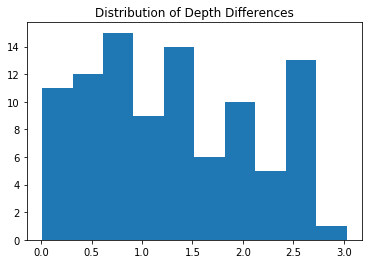

In [249]:
plt.figure()

plt.hist(option1_differences)
plt.title('Distribution of Depth Differences')

print(np.array(option1_differences).std())
print(chisquare(option1_differences, uniform))
plt.show()


In [88]:
option2 = copy.deepcopy(discriminations)
option2_differences = copy.deepcopy(differences)

0.7297319898324904


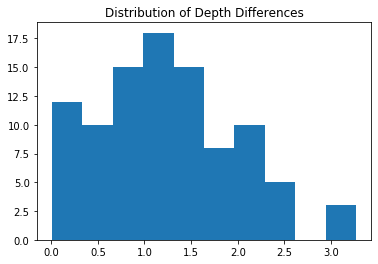

In [202]:
plt.figure()

plt.hist(option2_differences)
plt.title('Distribution of Depth Differences')

print(np.array(option2_differences).std())

plt.show()

In [171]:
option3 = copy.deepcopy(discriminations)
option3_differences = copy.deepcopy(differences)

0.7715105008995148


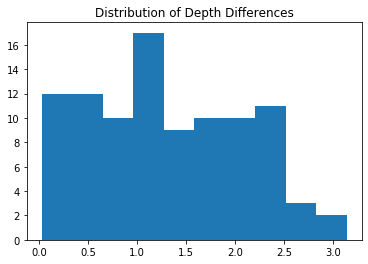

In [203]:
plt.figure()

plt.hist(option3_differences)
plt.title('Distribution of Depth Differences')

print(np.array(option3_differences).std())


plt.show()

In [589]:
option4 = copy.deepcopy(discriminations)
option4_differences = copy.deepcopy(differences)

0.7495098733841441


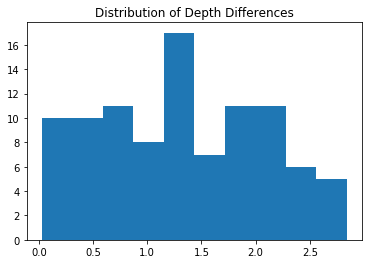

In [590]:
plt.figure()

plt.hist(option4_differences)
plt.title('Distribution of Depth Differences')

print(np.array(option4_differences).std())


plt.show()

# Constrain to Depth Differences =< 1 meter

In [6]:
VE_seq_arr[0]

# (1) first sort by depth? 

array(['depth_duration_stimuli/002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4/002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4-original.jpg',
       '2.354'], dtype='<U155')

In [7]:

# Python code to sort the tuples using second element 
# of sublist Function to sort using sorted()
def Sort(sub_li):
  
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of 
    # sublist lambda has been used
    return(sorted(sub_li, key = lambda x: x[1]))    
  
# Driver Code
sorted_VE_seq = Sort(VE_seq)

In [8]:
sorted_VE_seq[0]

['depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-original.jpg',
 1.138]

In [62]:
# indeces to VE trials 
indeces = np.arange(0,192)
indeces = list(indeces)
final_picks = []

sampled_indeces = []
while len(final_picks) < 96:
    rand_pick = random.sample(set(indeces), 2)
    d1 = sorted_VE_seq[rand_pick[0]][1]
    d2 = sorted_VE_seq[rand_pick[1]][1]
    diff = abs(d1-d2)
    if any(x in sampled_indeces for x in rand_pick) == False:
        # 0.15 min if needed
        if 0.25 <= diff <= 1.25:
            final_picks.append(rand_pick)
            sampled_indeces.append(rand_pick[0])
            sampled_indeces.append(rand_pick[1])
    


KeyboardInterrupt: 

In [63]:
len(final_picks)

94

In [13]:
discrim_trials = []

for combo in final_picks:
    i0 = combo[0]
    i1 = combo[1]
    dtrial = [sorted_VE_seq[i0], sorted_VE_seq[i1]]
    discrim_trials.append(dtrial)

discrim_trials

[[['depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-original.jpg',
   1.138],
  ['depth_duration_stimuli/002344_2014-06-28_20-06-29_260595134347_rgbf000030-resize_1/002344_2014-06-28_20-06-29_260595134347_rgbf000030-resize_1-original.jpg',
   1.5795]],
 [['depth_duration_stimuli/001011_2014-06-08_23-18-54_260595134347_rgbf000044-resize_4/001011_2014-06-08_23-18-54_260595134347_rgbf000044-resize_4-original.jpg',
   2.473],
  ['depth_duration_stimuli/001810_2014-06-26_20-51-35_260595134347_rgbf000040-resize_3/001810_2014-06-26_20-51-35_260595134347_rgbf000040-resize_3-original.jpg',
   2.2525]],
 [['depth_duration_stimuli/001617_2014-06-20_11-35-32_260595134347_rgbf000066-resize_1/001617_2014-06-20_11-35-32_260595134347_rgbf000066-resize_1-original.jpg',
   3.791],
  ['depth_duration_stimuli/002444_2014-06-28_20-32-08_260595134347_rgbf000027-resize_0/002444_2014-06-28_20-32-08_260595134347_rgbf

In [14]:
VE_seq[0]

['depth_duration_stimuli/002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4/002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4-original.jpg',
 2.354]

In [64]:
solution5 = copy.deepcopy(final_picks)

solution5_arr = np.array(solution5)

with open('solution5_discrimination.npy', 'wb') as f:
    np.save(f, solution5_arr)

In [15]:
solution3 = copy.deepcopy(final_picks)

solution3_arr = np.array(solution3)

with open('solution3_discrimination.npy', 'wb') as f:
    np.save(f, solution3_arr)

In [933]:
# sol2_discrim_trials = []

# for combo in solution2:
#     i0 = combo[0]
#     i1 = combo[1]
#     dtrial = [VE_seq[i0], VE_seq[i1]]
#     sol2_discrim_trials.append(dtrial)
    
    

In [925]:
sol2_discrim_trials[1]

[['depth_duration_stimuli/001447_2014-06-19_17-00-32_260595134347_rgbf000082-resize_5/001447_2014-06-19_17-00-32_260595134347_rgbf000082-resize_5-original.jpg',
  4.1377500000000005],
 ['depth_duration_stimuli/001650_2014-06-20_12-09-00_260595134347_rgbf000087-resize_3/001650_2014-06-20_12-09-00_260595134347_rgbf000087-resize_3-original.jpg',
  1.9505]]

In [897]:
solution1 = copy.deepcopy(final_picks)

solution1_arr = np.array(solution1)

In [898]:
with open('solution1_discrimination.npy', 'wb') as f:
    np.save(f, solution1_arr)

In [994]:
solution5 = np.load('solution5_discrimination.npy')



In [995]:
sol5_discrim_trials = []

for combo in solution5:
    i0 = combo[0]
    i1 = combo[1]
    dtrial = [sorted_VE_seq[i0], sorted_VE_seq[i1]]
    sol5_discrim_trials.append(dtrial)

    


0.6880882092198581 0.28657099530877167


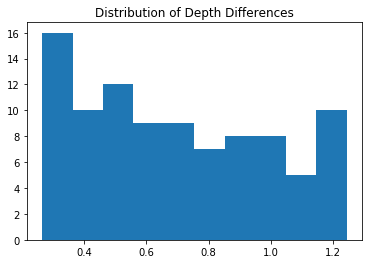

In [996]:
    
# look at distribution of depth differences in the random sequence

differences = []

for trial in sol5_discrim_trials:
    depth0 = float(trial[0][1])
    depth1 = float(trial[1][1])
    
    diff = abs(depth0-depth1)
    differences.append(diff)

    
    
plt.figure()


plt.hist(differences)
plt.title('Distribution of Depth Differences')


print(np.array(differences).mean(),np.array(differences).std())

plt.show()

In [44]:
print(len(sol4_discrim_trials))

85


In [1066]:
np.array(differences).min()

0.266

## Load Raw TAC Verbal Judgement Data

In [997]:
# TAC_raw_individual_trial_data_path  = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

TAC_raw_individual_trial_data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# x data
with open(TAC_raw_individual_trial_data_path + 'X_250.npy' , 'rb') as f:
    TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
    TAC_X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
    TAC_X_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_1000.npy' , 'rb') as f:
    TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_raw_individual_trial_data_path + 'final_y_250.npy' , 'rb') as f:
    TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
    TAC_final_y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
    TAC_final_y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_1000.npy' , 'rb') as f:
    TAC_final_y_1000= np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_250.npy', 'rb') as f:
    TAC_final_stim_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy', 'rb') as f:
    TAC_final_stim_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy', 'rb') as f:
    TAC_final_stim_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_1000.npy', 'rb') as f:
    TAC_final_stim_1000 = np.load(f, allow_pickle=True)
    
# std data
with open(TAC_raw_individual_trial_data_path + 'std_250.npy' , 'rb') as f:
    TAC_std_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'std_500.npy' , 'rb') as f:
    TAC_std_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'std_750.npy' , 'rb') as f:
    TAC_std_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'std_1000.npy' , 'rb') as f:
    TAC_std_1000 = np.load(f, allow_pickle=True)

## Load Normalized TAC Verbal Judgement Data


In [998]:
# TAC_normed_individual_trial_data_path = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'

TAC_normed_individual_trial_data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'

# TAC_normed_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'


# x data
with open(TAC_normed_individual_trial_data_path + 'n_X_250.npy' , 'rb') as f:
    n_TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_500.npy' , 'rb') as f:
    n_TAC_X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_X_750.npy' , 'rb') as f:
    n_TAC_X_750 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_1000.npy' , 'rb') as f:
    n_TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_normed_individual_trial_data_path + 'n_final_y_250.npy' , 'rb') as f:
    n_TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_500.npy' , 'rb') as f:
    n_TAC_final_y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_750.npy' , 'rb') as f:
    n_TAC_final_y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_1000.npy' , 'rb') as f:
    n_TAC_final_y_1000= np.load(f, allow_pickle=True)

# std data
with open(TAC_normed_individual_trial_data_path + 'n_std_250.npy' , 'rb') as f:
    n_TAC_std_250 = np.load(f, allow_pickle=True)


with open(TAC_normed_individual_trial_data_path + 'n_std_1000.npy' , 'rb') as f:
    n_TAC_std_1000 = np.load(f, allow_pickle=True)
    
    
# ste data
with open(TAC_normed_individual_trial_data_path + 'n_ste_250.npy' , 'rb') as f:
    n_TAC_ste_250 = np.load(f, allow_pickle=True)


with open(TAC_normed_individual_trial_data_path + 'n_ste_1000.npy' , 'rb') as f:
    n_TAC_ste_1000 = np.load(f, allow_pickle=True)

In [128]:
TAC_final_stim_1000[0]

'depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-target.png'

In [999]:
n_VE_answerkey_1000 = {} # corresponding answer key for discrimination trials  

for combo in sol5_discrim_trials:
    depth_dur_path0 = combo[0][0][:-13] + '-target.png'
    targetimg0 = depth_dur_path0.split('/')[-1]
    idx0 = np.where(TAC_final_stim_1000 == depth_dur_path0)[0][0]
    avg_estim_stim0 = n_TAC_final_y_1000[idx0]
    std0 = n_TAC_std_1000[idx0]


    depth_dur_path1 = combo[1][0][:-13] + '-target.png'
    targetimg1 = depth_dur_path1.split('/')[-1]
    idx1= np.where(TAC_final_stim_1000 == depth_dur_path1)[0][0]
    avg_estim_stim1 = n_TAC_final_y_1000[idx1]
    std1 = n_TAC_std_1000[idx1]
    
    if avg_estim_stim0 < avg_estim_stim1:
        # Which target is CLOSER to you?
        answer = targetimg0
    if avg_estim_stim0 == avg_estim_stim1:
        print(targetimg0, targetimg1)
    if avg_estim_stim0 > avg_estim_stim1:
        answer = targetimg1

    n_VE_answerkey_1000[targetimg0] = {'stimulus_1': targetimg1,
                             'stimulus_0_avg_estim': avg_estim_stim0,
                             'stimulus_1_avg_estim': avg_estim_stim1,
                             'answer': answer,
                             'std0': std0,
                             'std1': std1,
                             'VE_depth_diff': abs(avg_estim_stim0-avg_estim_stim1)}

In [1000]:
all_VE_depthdiffs = []

for key in n_VE_answerkey_1000.keys():
    VE_depthdiff = n_VE_answerkey_1000[key]['VE_depth_diff']
    all_VE_depthdiffs.append(VE_depthdiff)
    

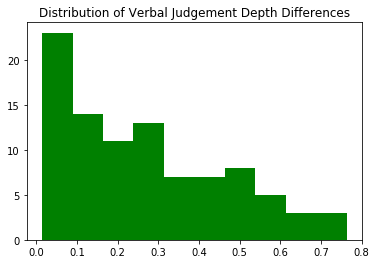

In [1001]:
plt.figure()


plt.hist(all_VE_depthdiffs, color='green')
plt.title('Distribution of Verbal Judgement Depth Differences')


plt.show()

In [70]:
np.min(np.array(all_VE_depthdiffs))

0.014427135057425988

In [1006]:
all_discrim_trials = []

for trial in sol5_discrim_trials:
    trial_dict = {}
    stim1 = trial[0]
    stim2 = trial[1]
    
    depth0 = float(trial[0][1])
    depth1 = float(trial[1][1])
    
    diff = abs(depth0-depth1)
    
    if depth0 < depth1:  
        trial_dict['stim1'] = [stim1[0].split('/')[-1][:-13], stim1[1]]
        trial_dict['stim2'] = [stim2[0].split('/')[-1][:-13], stim2[1]]
    else:
        trial_dict['stim1'] = [stim2[0].split('/')[-1][:-13], stim2[1]]
        trial_dict['stim2'] = [stim1[0].split('/')[-1][:-13], stim1[1]]
    
    trial_dict['diff'] = diff
    
    all_discrim_trials.append(trial_dict)
    
random.shuffle(all_discrim_trials)

In [1008]:
all_discrim_trials[0:2]

[{'stim1': ['000854_2014-06-09_19-43-13_260595134347_rgbf000066-resize_0',
   3.068],
  'stim2': ['000758_2014-06-08_22-05-08_260595134347_rgbf000085-resize_0',
   3.3810000000000002],
  'diff': 0.31300000000000017},
 {'stim1': ['001110_2014-06-15_17-25-28_260595134347_rgbf000150-resize_1',
   1.7115],
  'stim2': ['000927_2014-06-09_16-32-30_260595134347_rgbf000123-resize_3',
   2.6785],
  'diff': 0.9670000000000001}]

In [1004]:
destination = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/discrimination_sequences/january2022'

# destination = '/Users/prachi/Documents/depth_duration/depth_discrimination/discrimination_sequences/january2022'


In [1009]:
len(all_discrim_trials), all_discrim_trials[0]

(94,
 {'stim1': ['000854_2014-06-09_19-43-13_260595134347_rgbf000066-resize_0',
   3.068],
  'stim2': ['000758_2014-06-08_22-05-08_260595134347_rgbf000085-resize_0',
   3.3810000000000002],
  'diff': 0.31300000000000017})

In [160]:
blocks = all_discrim_trials

In [1043]:
sequence_dictionaries = []
rotated_sequence_dictionaries = [] # order of images is flipped
seq_names = ['j13']
durations = [250, 1000] * 47


# shuffle durations 
random.shuffle(durations)

seq = [] 
rotated_seq = []
sequence_name = seq_names[i]
rotated_seq_name = seq_names[i] + '_rotated' # order rotated
num = 0 # iterator for bins (48 total)
dur_num = 0 # iterator that ensures each mask is unique and is the index for durations (list)
count0 = 0
for trial in all_discrim_trials:
    img0 = trial['stim1'][0]
    img1 = trial['stim2'][0]
    
    dict_trial = {}
    dict_trial["sequence"] = sequence_name
    dict_trial["duration"] = durations[dur_num]
    depth0 = trial['stim1'][1]
    depth1 = trial['stim2'][1]
    
        
    if depth0 < depth1:
        count0 += 1
        # if even, then keep image order as is 
        # else flip image order so that there is a 50/50 split in the correct response distribution
        if (count0 % 2) == 0:
            dict_trial["depth_0"] = depth0
            dict_trial["depth_1"] = depth1

            # this has to be the path on the server
            targetimg_0_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'
            targetimg_1_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'

            dict_trial["image_path_target_0"] = targetimg_0_path
            dict_trial["image_path_target_1"] = targetimg_1_path

            dict_trial["mask_path"] = "masks/mask_" + str(num) + ".jpg"
            dict_trial["fixation_path"] = "fixation.jpg"

            seq.append(dict_trial)
    
    

            ###################### Rotated sequence ######################
            rotated_dict_trial = {}
            rotated_dict_trial["sequence"] = rotated_seq_name
            rotated_dict_trial["duration"] = durations[dur_num]
            dur_num += 1
            rotated_dict_trial["depth_0"] = depth1
            rotated_dict_trial["depth_1"] = depth0

            # this has to be the path on the server
            r_targetimg_0_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'
            r_targetimg_1_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'

            rotated_dict_trial["image_path_target_0"] = r_targetimg_0_path
            rotated_dict_trial["image_path_target_1"] = r_targetimg_1_path

            rotated_dict_trial["mask_path"] = "masks/mask_" + str(dur_num) + ".jpg"
            rotated_dict_trial["fixation_path"] = "fixation.jpg"

            rotated_seq.append(rotated_dict_trial)
            
            num += 1
                
        else: # FLIP IMAGE ORDER --> so that there is an even 50/50 balance of image0 and image1 correct answers
            dict_trial["depth_0"] = depth1
            dict_trial["depth_1"] = depth0


            # this has to be the path on the server
            targetimg_0_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'
            targetimg_1_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'

            dict_trial["image_path_target_0"] = targetimg_0_path
            dict_trial["image_path_target_1"] = targetimg_1_path

            dict_trial["mask_path"] = "masks/mask_" + str(num) + ".jpg"
            dict_trial["fixation_path"] = "fixation.jpg"

            seq.append(dict_trial)
            ###################### Rotated sequence ######################
            rotated_dict_trial = {}
            rotated_dict_trial["sequence"] = rotated_seq_name
            rotated_dict_trial["duration"] = durations[dur_num]
            rotated_dict_trial["depth_0"] = depth0
            rotated_dict_trial["depth_1"] = depth1
            dur_num += 1

            # this has to be the path on the server
            r_targetimg_0_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'
            r_targetimg_1_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'

            rotated_dict_trial["image_path_target_0"] = r_targetimg_0_path
            rotated_dict_trial["image_path_target_1"] = r_targetimg_1_path

            rotated_dict_trial["mask_path"] = "masks/mask_" + str(dur_num) + ".jpg"
            rotated_dict_trial["fixation_path"] = "fixation.jpg"

            rotated_seq.append(rotated_dict_trial)
            
    num += 1

# # shuffle the order of trials so that trials are not in order of increasing depth 
# # use the same random seed for sequence & it's rotation so trials match in images 
random.Random(i).shuffle(seq)
random.Random(i).shuffle(rotated_seq)
    
sequence_dictionaries.append(seq)
rotated_sequence_dictionaries.append(rotated_seq)

    
for sequence in sequence_dictionaries:
    name = sequence[0]["sequence"]
    path = destination + '/' + name + '.json'
    # creates json file for the sequence 
    with open(path, 'w') as f:
        json.dump(sequence , f)  
        
for rotated_sequence in rotated_sequence_dictionaries:
    rotated_name = rotated_sequence[0]["sequence"]
    rotated_path = destination + '/' + rotated_name + '.json'
    # creates json file for the sequence 
    with open(rotated_path, 'w') as f:
        json.dump(rotated_sequence , f) 

In [1044]:
len(seq), len(rotated_seq)

(94, 94)

In [161]:
sequence_dictionaries = []
rotated_sequence_dictionaries = [] # order of images is flipped
seq_names = ['j13']
durations = [250, 1000] * 47


# shuffle durations 
random.shuffle(durations)

for i in range(len(seq_names)):
    seq = [] 
    rotated_seq = []
    sequence_name = seq_names[i]
    rotated_seq_name = seq_names[i] + '_rotated' # order rotated
    num = 0 # iterator for bins (48 total)
    dur_num = 0 # iterator that ensures each mask is unique and is the index for durations (list)
    count0 = 0
    for trial in blocks:
        img0 = trial['stim1'][0]
        img1 = trial['stim2'][0]
        dict_trial = {}
        dict_trial["sequence"] = sequence_name
        dict_trial["duration"] = durations[dur_num]
        depth0 = trial['stim1'][1]
        depth1 = trial['stim2'][1]
        
        if depth0 < depth1:
            count0 += 1
            # if even, then keep image order as is 
            # else flip image order so that there is a 50/50 split in the correct response distribution
            if (count0 % 2) == 0:
                dict_trial["depth_0"] = depth0
                dict_trial["depth_1"] = depth1

                # this has to be the path on the server
                targetimg_0_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'
                targetimg_1_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'

                dict_trial["image_path_target_0"] = targetimg_0_path
                dict_trial["image_path_target_1"] = targetimg_1_path

                dict_trial["mask_path"] = "masks/mask_" + str(num) + ".jpg"
                dict_trial["fixation_path"] = "fixation.jpg"

                seq.append(dict_trial)
    
    

                ###################### Rotated sequence ######################
                rotated_dict_trial = {}
                rotated_dict_trial["sequence"] = rotated_seq_name
                rotated_dict_trial["duration"] = durations[dur_num]
                dur_num += 1
                rotated_dict_trial["depth_0"] = depth1
                rotated_dict_trial["depth_1"] = depth0

                # this has to be the path on the server
                r_targetimg_0_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'
                r_targetimg_1_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'

                rotated_dict_trial["image_path_target_0"] = r_targetimg_0_path
                rotated_dict_trial["image_path_target_1"] = r_targetimg_1_path

                rotated_dict_trial["mask_path"] = "masks/mask_" + str(dur_num) + ".jpg"
                rotated_dict_trial["fixation_path"] = "fixation.jpg"

                rotated_seq.append(rotated_dict_trial)
                
            else: # FLIP IMAGE ORDER --> so that there is an even 50/50 balance of image0 and image1 correct answers
                
                dict_trial["depth_0"] = depth1
                dict_trial["depth_1"] = depth0


                # this has to be the path on the server
                targetimg_0_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'
                targetimg_1_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'

                dict_trial["image_path_target_0"] = targetimg_0_path
                dict_trial["image_path_target_1"] = targetimg_1_path

                dict_trial["mask_path"] = "masks/mask_" + str(num) + ".jpg"
                dict_trial["fixation_path"] = "fixation.jpg"

                seq.append(dict_trial)
                ###################### Rotated sequence ######################
                rotated_dict_trial = {}
                rotated_dict_trial["sequence"] = rotated_seq_name
                rotated_dict_trial["duration"] = durations[dur_num]
                rotated_dict_trial["depth_0"] = depth0
                rotated_dict_trial["depth_1"] = depth1
                dur_num += 1

                # this has to be the path on the server
                r_targetimg_0_path = "depth_discrimination_stimuli/" + img0 + '/' + img0 + '-target.png'
                r_targetimg_1_path = "depth_discrimination_stimuli/" + img1 + '/' + img1 + '-target.png'

                rotated_dict_trial["image_path_target_0"] = r_targetimg_0_path
                rotated_dict_trial["image_path_target_1"] = r_targetimg_1_path

                rotated_dict_trial["mask_path"] = "masks/mask_" + str(dur_num) + ".jpg"
                rotated_dict_trial["fixation_path"] = "fixation.jpg"

                rotated_seq.append(rotated_dict_trial)

        num += 1

    # shuffle the order of trials so that trials are not in order of increasing depth 
    # use the same random seed for sequence & it's rotation so trials match in images 
    random.Random(i).shuffle(seq)
    random.Random(i).shuffle(rotated_seq)
    random.Random(i).shuffle(seq)
    random.Random(i).shuffle(rotated_seq)

    
    sequence_dictionaries.append(seq)
    rotated_sequence_dictionaries.append(rotated_seq)

    
for sequence in sequence_dictionaries:
    name = sequence[0]["sequence"]
    path = destination + '/' + name + '.json'
    # creates json file for the sequence 
    with open(path, 'w') as f:
        json.dump(sequence , f)  
        
for rotated_sequence in rotated_sequence_dictionaries:
    rotated_name = rotated_sequence[0]["sequence"]
    rotated_path = destination + '/' + rotated_name + '.json'
    # creates json file for the sequence 
    with open(rotated_path, 'w') as f:
        json.dump(rotated_sequence , f) 

### Rotate Sequence by Duration

In [1045]:
import os 

def load_sequence(jsonpath):
    return json.load(open(jsonpath))

def rotate_sequence(previous_seq):
    """
    Rotates each trial's duration assignment based on previous sequence 
    250 --> 1000
    1000 --> 250
    """
    rotated = previous_seq
    for i in range(len(previous_seq)):
        duration = previous_seq[i]['duration']
        if duration == 1000:
            new_duration = 250
        else:
            new_duration = 1000
        rotated[i]['duration'] = new_duration
        
    return rotated

def create_duration_rotations(jsonpath, exit, name):
    """
    Args:
        jsonpath = path to master json created through sequence pipeline
        exit = destination path for new jsons 
        name = i.e. V1 
    
    Creates sequences rotated by duration so that all images in the master sequence are seen at each duration
    (across participants)
        
    """
    master = load_sequence(jsonpath)
    
    r = rotate_sequence(master)
    r_path = exit + '/' + name + '_dr.json' # duration rotated sequence
    #creates json file for the sequence 
    with open(r_path, 'w') as f:
        json.dump(r , f)

        
def main_seq_rotations(json_folderpath, exit):
    """
    Create rotated sequence for each sequence in the folder
    """
    for file in os.listdir(json_folderpath):
        name = file.split(".")[0]
        jsonpath = json_folderpath + "/" + file
        try:
            create_duration_rotations(jsonpath, exit, name)
        except:
            print("Failed to create json rotations for: ", file)

In [1046]:
main_seq_rotations(destination,destination)

Failed to create json rotations for:  j13
Failed to create json rotations for:  .DS_Store
Failed to create json rotations for:  .ipynb_checkpoints


## Check Accuracy Distribution for each sequence (Image 1 vs. 2) 

Ideally it should be 50/50

In [1047]:
def Discrimination_AccurateResponse_Distribution(jsondata):
    """
    args: json data in a dictionary format
    returns: [count0,count1] 
             where count0 is the number of trials where image 0 is the correct answer 
             where count1 is the number of trials where image 1 is the correct answer
             
    Question: Which target is CLOSER to you? 
    """
    count0 = 0
    count1 = 0
    equal = 0
    
    for trial in jsondata:
        depth0 = trial['depth_0']
        depth1 = trial['depth_1']
        if depth0 < depth1:
            count0 += 1
        if depth0 > depth1:
            count1 += 1
        if depth0 == depth1:
            equal += 1
    return [count0, count1, equal]

In [1048]:
main_distribution = {}

for js in os.listdir(destination):
    if '.json' in js:
        j_path = destination + '/' + js
        with open(j_path) as f:
            data = json.load(f)
            main_distribution[js] = Discrimination_AccurateResponse_Distribution(data)

main_distribution            
# 88 real trials and 8 catch trials per sequence
# distribution should be 50/50  

{'j13_dr.json': [47, 47, 0],
 'j13_rotated_dr.json': [47, 47, 0],
 'j13_rotated.json': [47, 47, 0],
 'j13.json': [47, 47, 0]}

# Catch Trials

These trials are added to ensure that the participant is paying attention. There will be 8 catch trials, with 2 in each block. Catch trials have the same image presented twice. Participants should press the spacebar to indicate that the same image was shown.

In [1024]:
kinect2 = '/Users/prachi/Documents/depth_duration/SUNRGBD/kv2/kinect2data'

sampled_stimuli_path = '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/final_stimuli'

target_stimuli = '/Users/prachi/Documents/depth_duration/mar3_depthDuration_stimuli/targetImages_kinect2data_subset'

# catch trials should NOT have stimuli from the final set of stimuli for the discrimination and verbal judgement


In [1025]:
final_long = ['/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
              '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
              '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
              '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
              '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/002364_2014-06-28_20-11-05_260595134347_rgbf000042-resize_0',
              '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/002675_2014-06-13_16-08-49_094959634447_rgbf000151-resize_2',
              '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/003125_2014-05-12_10-39-22_094959634447_rgbf000100-resize_0',
              '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/003395_2014-05-20_15-39-18_094959634447_rgbf000101-resize_0']
len(final_long)

8

In [1026]:
final_long_images = [elem.split('/')[-1][:-2] for elem in final_long]
final_long_images

['000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize',
 '000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize',
 '000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize',
 '002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize',
 '002364_2014-06-28_20-11-05_260595134347_rgbf000042-resize',
 '002675_2014-06-13_16-08-49_094959634447_rgbf000151-resize',
 '003125_2014-05-12_10-39-22_094959634447_rgbf000100-resize',
 '003395_2014-05-20_15-39-18_094959634447_rgbf000101-resize']

In [1027]:
final_short = ['/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000454_2014-06-08_16-37-28_260595134347_rgbf000048-resize_2',
               '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000868_2014-06-09_20-49-52_260595134347_rgbf000064-resize_4',
               '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000953_2014-06-08_11-42-19_260595134347_rgbf000083-resize_0',
               '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001012_2014-06-08_23-19-38_260595134347_rgbf000057-resize_0',
               '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
               '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
               '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
               '/Users/prachi/Documents/depth_duration/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']


In [1028]:
len(final_short)

8

In [1032]:
final_a = ['/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
           '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
           '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
           '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
           '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
           '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
           '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
           '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/depth_discrimination_MTurk/discrimination_catch_trials/001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']
           
random.shuffle(final_a)
final_b = final_a
final_a == final_b

True

In [1040]:
len(final_a)

8

In [1033]:
final_catch = [[final_a[i], final_b[i]] for i in range(len(final_a))]


In [109]:
# for file in possible:
#     with open(file + '/' + 'data.json') as f:
#         data = json.load(f)
#         depth = data['objects'][0]['crossing_point'][0]['depth']

In [1049]:
import random
catch_trials = []
count = 0
durations = [250, 250, 250, 250, 1000, 1000, 1000, 1000]
random.shuffle(durations)

for ctrial in final_catch:
    if count % 2 == 0:
        dict_ctrial = {}
        cimg0 = ctrial[0]
        cimg1 = ctrial[1]
        dict_ctrial["sequence"] = 'catch_trial'
        dict_ctrial["duration"] = durations[count]
        
        with open(cimg0 + '/' + 'data.json') as f:
            data = json.load(f)
            depth0 = data['objects'][0]['crossing_point'][0]['depth']
        with open(cimg1 + '/' + 'data.json') as f:
            data = json.load(f)
            depth1 = data['objects'][0]['crossing_point'][0]['depth']
        
        dict_ctrial["depth_0"] = depth0
        dict_ctrial["depth_1"] = depth1
        
        c0 = cimg0.split('/')[-1]
        c1 = cimg1.split('/')[-1]
        # this has to be the path on the server
        ctargetimg_0_path = "depth_discrimination_stimuli/" + c0 + '/' + c0 + '-target.png'
        ctargetimg_1_path = "depth_discrimination_stimuli/" + c1 + '/' + c1 + '-target.png'

        dict_ctrial["image_path_target_0"] = ctargetimg_0_path
        dict_ctrial["image_path_target_1"] = ctargetimg_1_path

        dict_ctrial["mask_path"] = "masks/mask_" + str(count) + ".jpg"
        dict_ctrial["fixation_path"] = "fixation.jpg"
        
    else:
        dict_ctrial = {}
        cimg0 = ctrial[1]
        cimg1 = ctrial[0]
        dict_ctrial["sequence"] = 'catch_trial'
        dict_ctrial["duration"] = durations[count]
        
        with open(cimg0 + '/' + 'data.json') as f:
            data = json.load(f)
            depth0 = data['objects'][0]['crossing_point'][0]['depth']
        with open(cimg1 + '/' + 'data.json') as f:
            data = json.load(f)
            depth1 = data['objects'][0]['crossing_point'][0]['depth']
            
        dict_ctrial["depth_0"] = depth0
        dict_ctrial["depth_1"] = depth1
        
        c0 = cimg0.split('/')[-1]
        c1 = cimg1.split('/')[-1]
        # this has to be the path on the server
        ctargetimg_0_path = "depth_discrimination_stimuli/" + c0 + '/' + c0 + '-target.png'
        ctargetimg_1_path = "depth_discrimination_stimuli/" + c1 + '/' + c1 + '-target.png'

        dict_ctrial["image_path_target_0"] = ctargetimg_0_path
        dict_ctrial["image_path_target_1"] = ctargetimg_1_path

        dict_ctrial["mask_path"] = "masks/mask_" + str(count) + ".jpg"
        dict_ctrial["fixation_path"] = "fixation.jpg"
        
    count += 1

    catch_trials.append(dict_ctrial)

random.shuffle(catch_trials)

In [1050]:
len(catch_trials)

8

In [1056]:
with open('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/discrimination_sequences/january2022/j13_dr.json') as f:
    t = json.load(f)
    
len(t)   

94

In [1059]:
94-69

25

## Add catch trials

In [1052]:
v3_seq = destination
v4_seq = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/discrimination_sequences/january2022/j13'



In [1060]:
v4_sequences = {}
for seq in os.listdir(v3_seq):
    if '.json' in seq:
        with open(v3_seq + '/' + seq) as f:
            data = json.load(f)
            print(len(data))
            
            block1 = data[0:23]
            block2 = data[23:46]
            block3 = data[46:69]
            block4 = data[69:]
            block1 += catch_trials[0:2]
            block2 += catch_trials[2:4]
            block3 += catch_trials[4:6]
            block4 += catch_trials[6:8]
            random.shuffle(block1)
            random.shuffle(block2)
            random.shuffle(block3)
            random.shuffle(block4)
            
            # does not work when len(data) is not a multiple of 4
#             block1 = data[0:len(data)//4]
#             block2 = data[(len(data)//4):(len(data)//4)*2]
#             block3 = data[(len(data)//4)*2:(len(data)//4)*3]
#             block4 = data[(len(data)//4)*3:(len(data)//4)*4]
#             block1 += catch_trials[0:2]
#             block2 += catch_trials[2:4]
#             block3 += catch_trials[4:6]
#             block4 += catch_trials[6:8]
#             random.shuffle(block1)
#             random.shuffle(block2)
#             random.shuffle(block3)
#             random.shuffle(block4)
            
            new_seq = block1 + block2 + block3 + block4
            v4_sequences[seq] = new_seq

94
94
94
94


In [1061]:
for seq in v4_sequences:
    print(len(v4_sequences[seq]))

102
102
102
102


In [1063]:
# creates json file for the sequence 
for seq in v4_sequences:
    if 'json' in seq:
        dest = v4_seq + '/' + seq
        with open(dest, 'w') as f:
            json.dump(v4_sequences[seq] , f)  